In [1]:
import numpy as pn

In [2]:
import pandas as pd

In [3]:
import array

In [4]:
import itertools

In [5]:
import matplotlib.pyplot as pl

In [6]:
import matplotlib.image as mpimg

In [7]:
####################################        Header        ###############################################################

In [8]:
f = open("mdb155.pgm", "rb")
L = f.readlines()
L2 = [L[i] for i in range(0,len(L)) if i < 3]
[e.decode().rstrip() for e in L2]
# type, cols*rows, maxValue

['P5', '1024 1024', '255']

In [9]:
###########################################################     Data     ################################################

In [10]:
L3 = [L[i] for i in range(0,len(L)) if i >= 3]
L4 = [array.array('B', e).tolist() for e in L3 ]
data = list(itertools.chain(*L4))
1024*1024 == len(data)

True

In [11]:
", ".join([str(e) for e in data])

'0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 141, 200, 200, 197, 198, 195, 195, 196, 197, 196, 195, 195, 193, 193, 194, 191, 193, 191, 190, 189, 186, 186, 183, 187, 186, 185, 184, 181, 180, 181, 179, 179, 179, 178, 179, 180, 175, 173, 173, 173, 173, 171, 170, 170, 168, 166, 166, 166, 166, 165, 165, 164, 162, 162, 160, 159, 159, 157, 154, 153, 155, 152, 151, 145, 147, 148, 149, 146, 145, 145, 144, 143, 146, 144, 147, 146, 139, 139, 138, 140, 138, 138, 138, 136, 137, 133, 131, 127, 130, 129, 128, 127, 125, 126, 123, 119, 119, 120, 120, 118, 119, 116, 115, 113, 116, 114, 111, 112, 111, 114, 111, 109, 106, 105, 102, 102, 100, 98, 98, 97, 96, 96, 96, 94, 95, 91, 90, 91, 90, 87, 86, 83, 83, 82, 80, 82, 80, 82, 80, 78, 74, 75, 75, 72, 73, 74, 71, 70, 70, 65, 67, 64, 63, 61, 60, 57, 57, 55, 58, 54, 53, 52, 50, 50, 48, 48, 47, 48, 46, 44, 45, 44, 43, 42, 43, 40, 41, 40, 39, 38, 35, 36, 36, 35, 33, 33, 33, 31, 29, 30, 30, 30, 28, 26, 28, 27, 25, 26, 26, 24, 24, 23, 21, 24, 20, 21, 23, 21, 20, 21, 21, 23

In [12]:
############################################        Histogram       #####################################################

In [13]:
df = pd.DataFrame(data)
df = df.rename(columns={0:"n"})
df.groupby(['n'])['n'].count()

n
0      394010
1         410
2        3246
3       13832
4       38159
        ...  
225       601
226       680
227       481
228       185
229        24
Name: n, Length: 230, dtype: int64

In [14]:
df2 = df.loc[df['n'] > 0] #without values of 0

Text(0, 0.5, 'times')

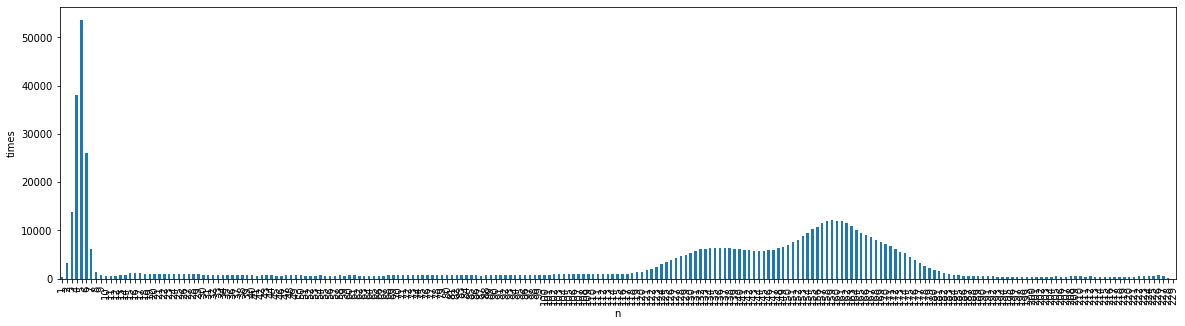

In [15]:
f = pl.figure(figsize=(20,5)) #size of the figure, 20x + y5
ax = f.gca() 

df2.groupby(['n'])['n'].count().plot(kind="bar", x="n").set_ylabel("times") # Histo Grama

In [16]:
############   average   ################################################################################################

In [17]:
whioutZero = [e for e in data if e is not 0]

In [18]:
avg = sum(whioutZero)/len(whioutZero)

In [19]:
maxValue = max(whioutZero) # max value in data

In [20]:
minValue = min(whioutZero) # min value without 0

In [21]:
z = (maxValue - minValue)/avg
z

2.068064794658987

In [22]:
#o = map(lambda x: 255 if x>z else 0,data)
o = map(lambda x: 0 if x>190 else x,data) #output after apply map for especifict values in this case was manually set
output = list(o)

In [23]:
############# writing a file ############################################################################################

In [24]:
f2 = open("output.pgm", "wb")

In [25]:
f2.write(L2[0]) # type of file
f2.write(L2[1]) # size of file
f2.write(L2[2]) # max value

4

In [26]:
newFileByteArray = bytearray(output)

In [27]:
f2.write(newFileByteArray)

1048576

In [28]:
f2.close()

In [29]:
#############     input and output       ################################################################################

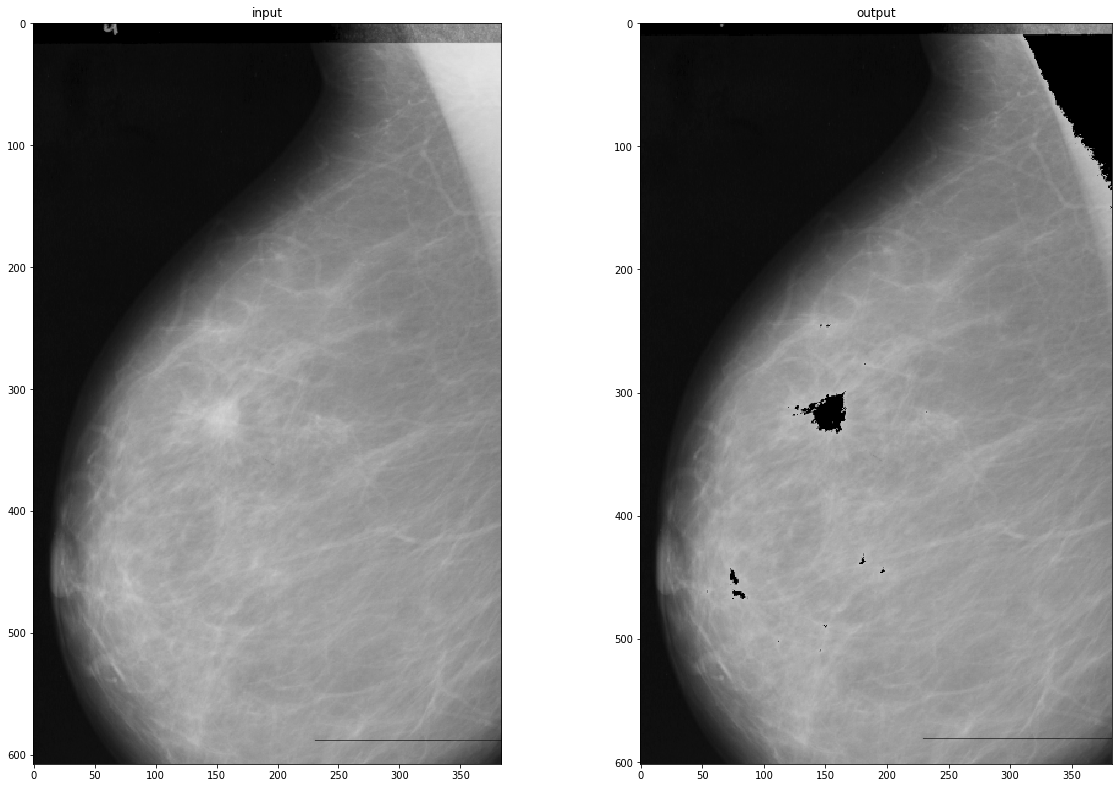

In [30]:
%matplotlib inline

images_name = ["input.png","output.png"]
images = [mpimg.imread(name) for name in images_name]

pl.figure(figsize=(20,30)) # size of the figure

columns = 2
for i, image in enumerate(images):
    pl.subplot(len(images) / columns + 1, columns, i + 1)
    pl.title(images_name[i].split(".")[0])
    pl.imshow(image)